# Hans-EDA

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('./Data/salary_cleaned.csv', index_col = None)
df.head()

,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,...,month,year_month,timestamp_3mos,year_month_3mos,state_short,inflation_rate,inflation_rate_3mos,state,employment_rate,employment_rate_3mos
0,0,2018-06-03 13:58:20,Yahoo,IC2,Software Engineer,160.5,"Sunnyvale, CA",0.58,0.58,Full Stack,...,6,2018-06,2018-03-03 13:58:20,2018-03,CA,0.029,0.024,California,0.957660,0.956797
1,2,2018-06-04 20:28:22,Facebook,E3,Software Engineer,165.0,"Seattle, WA",1.00,1.00,Full Stack,...,6,2018-06,2018-03-04 20:28:22,2018-03,WA,0.029,0.024,Washington,0.955998,0.954978
2,3,2018-06-05 00:56:33,VmWare,Senior MTS,Software Engineer,218.0,"Palo Alto, CA",8.00,1.00,Distributed Systems (Back-End),...,6,2018-06,2018-03-05 00:56:33,2018-03,CA,0.029,0.024,California,0.957660,0.956797
3,4,2018-06-05 01:19:05,Uber,L4,Software Engineer,240.0,"San Francisco, CA",3.00,0.00,Web Development (Front-End),...,6,2018-06,2018-03-05 01:19:05,2018-03,CA,0.029,0.024,California,0.957660,0.956797
4,5,2018-06-05 07:13:17,Capital One,Master Software Engineer,Software Engineer,196.0,"New York, NY",8.00,2.00,iOS,...,6,2018-06,2018-03-05 07:13:17,2018-03,NY,0.029,0.024,New York,0.959053,0.955962


In [15]:
df.shape

(24496, 21)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24496 entries, 0 to 24495
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               24496 non-null  int64  
 1   timestamp                24496 non-null  object 
 2   company                  24496 non-null  object 
 3   level                    24496 non-null  object 
 4   title                    24496 non-null  object 
 5   totalyearlycompensation  24496 non-null  float64
 6   location                 24496 non-null  object 
 7   yearsofexperience        24496 non-null  float64
 8   yearsatcompany           24496 non-null  float64
 9   tag                      24496 non-null  object 
 10  year                     24496 non-null  int64  
 11  month                    24496 non-null  int64  
 12  year_month               24496 non-null  object 
 13  timestamp_3mos           24496 non-null  object 
 14  year_month_3mos       

In [17]:
df.drop(columns = ['Unnamed: 0', 'timestamp', 'location', 'timestamp_3mos', 'state'], inplace = True)

df.head()

,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,tag,year,month,year_month,year_month_3mos,state_short,inflation_rate,inflation_rate_3mos,employment_rate,employment_rate_3mos
0,Yahoo,IC2,Software Engineer,160.5,0.58,0.58,Full Stack,2018,6,2018-06,2018-03,CA,0.029,0.024,0.957660,0.956797
1,Facebook,E3,Software Engineer,165.0,1.00,1.00,Full Stack,2018,6,2018-06,2018-03,WA,0.029,0.024,0.955998,0.954978
2,VmWare,Senior MTS,Software Engineer,218.0,8.00,1.00,Distributed Systems (Back-End),2018,6,2018-06,2018-03,CA,0.029,0.024,0.957660,0.956797
3,Uber,L4,Software Engineer,240.0,3.00,0.00,Web Development (Front-End),2018,6,2018-06,2018-03,CA,0.029,0.024,0.957660,0.956797
4,Capital One,Master Software Engineer,Software Engineer,196.0,8.00,2.00,iOS,2018,6,2018-06,2018-03,NY,0.029,0.024,0.959053,0.955962


In [18]:
df.shape

(24496, 16)

In [20]:
# Looking for unique values in object type columns

for column in df:
    print(f'{column} : {sorted(list(df[column].unique()), reverse = True)[0:5]}')

company : ['zynga', 'zoox', 'zillow group', 'yahoo', 'workday']
level : ['Сontractor', '||', 'x6', 'vice president', 'unknown']
title : ['Technical Program Manager', 'Solution Architect', 'Software Engineering Manager', 'Software Engineer', 'Sales']
totalyearlycompensation : [4950.0, 2500.0, 2000.0, 1950.0, 1800.0]
yearsofexperience : [41.0, 40.0, 39.0, 37.0, 36.0]
yearsatcompany : [34.0, 32.0, 30.0, 28.0, 27.0]
tag : ['Èda ', 'ux', 'user Experience ', 'unix/linux', 'undecided']
year : [2020, 2019, 2018]
month : [12, 11, 10, 9, 8]
year_month : ['2020-09', '2020-08', '2020-07', '2020-06', '2020-05']
year_month_3mos : ['2020-06', '2020-05', '2020-04', '2020-03', '2020-02']
state_short : ['WV', 'WI', 'WA', 'VT', 'VA']
inflation_rate : [0.03, 0.029, 0.027, 0.025, 0.023]
inflation_rate_3mos : [0.03, 0.029, 0.028, 0.027, 0.025]
employment_rate : [0.9761019371782508, 0.9757459236538152, 0.9756963448367676, 0.9756554434044054, 0.9755781867221222]
employment_rate_3mos : [0.9763629979362656, 0.9

### As shown, in 'totalyearlycompensation' there are thousands which mean MILLIONS? , also I think we could limit employment rate to 3 decimals.

#### Visuals

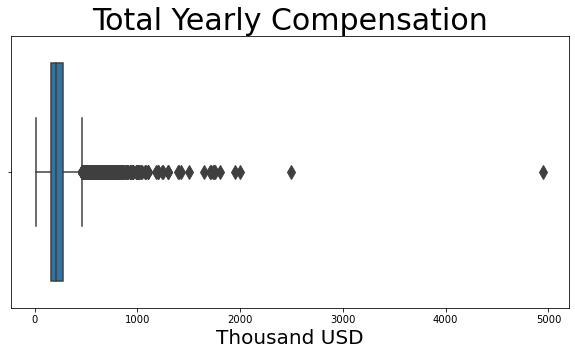

In [22]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(df['totalyearlycompensation'], fliersize = 10)
plt.title(label = 'Total Yearly Compensation', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('Thousand USD', fontdict = {'size': 20}, loc = 'center');

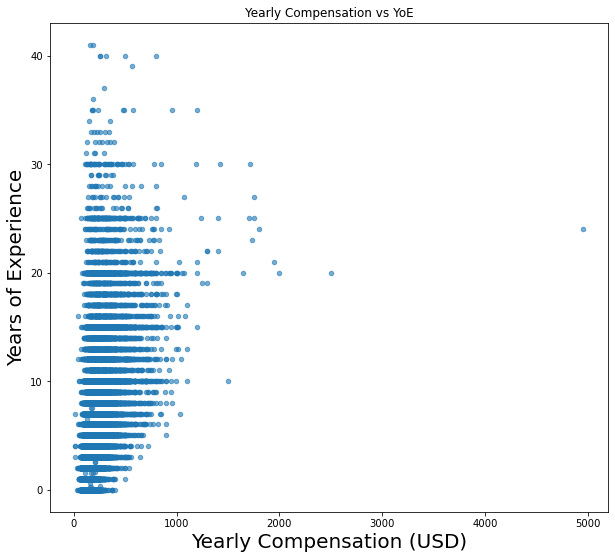

In [23]:
vs = df.plot(
    kind='scatter', 
    x='totalyearlycompensation',
    y='yearsofexperience',
    title="Yearly Compensation vs YoE",
    alpha=0.6, # set the opacity of the points (0 is completely transparent and 1 is opaque)
    figsize=(10,9)
)

vs.set_xlabel("Yearly Compensation (USD)", fontsize=20) # set the axes labels with a fontsize
vs.set_ylabel("Years of Experience", fontsize = 20);

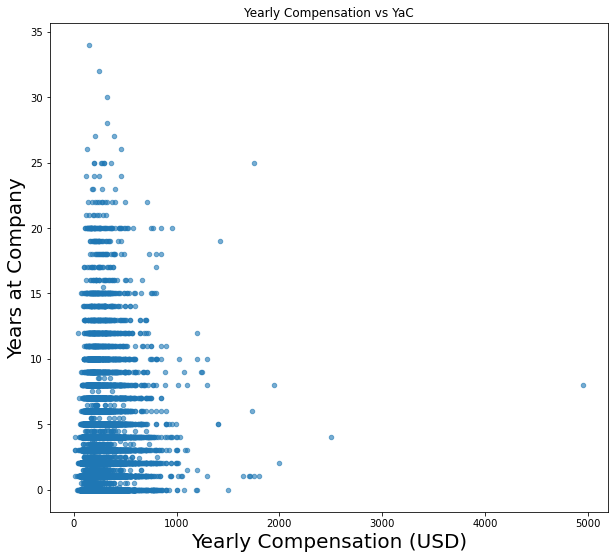

In [24]:
vs = df.plot(
    kind='scatter', 
    x='totalyearlycompensation',
    y='yearsatcompany',
    title="Yearly Compensation vs YaC",
    alpha=0.6, # set the opacity of the points (0 is completely transparent and 1 is opaque)
    figsize=(10,9)
)

vs.set_xlabel("Yearly Compensation (USD)", fontsize=20) # set the axes labels with a fontsize
vs.set_ylabel("Years at Company", fontsize = 20);